In [233]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# Προετοιμασία δεδομένων.

Διαγραφή της στήλης timestamp απο τον πίνακα ratings (αρχείο u.data) και εισαγωγή ονομάτων στις στήλες για κάθε σύνολο δεδομένων.

In [234]:
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
item_cols = ['movie_id', 'title', 'release_date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']

users = pd.read_csv('ml-100k/u.user', sep="|", names=user_cols, encoding='latin-1')

movies = pd.read_csv('ml-100k/u.item', sep="|", names=item_cols, encoding='latin-1')
movies = movies[['movie_id', 'title']]

ratings = pd.read_csv('ml-100k/u.data', sep="\t", names=rating_cols, encoding='latin-1')
ratings = ratings.drop('timestamp', axis=1)

Στο σετ δεδομένων users (u.user), υπάρχουν οι πληροφορίες: user_id, age, sex, occupation και zip_code.

In [235]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Στο σετ δεδομένων movies (u.item), υπάρχουν οι στήλες:

*['movie_id', 'title', 'release_date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']*,

αλλα εμείς κρατάμε μόνο τις στήλες *[movie_id και title]*, μιας και είναι οι μόνες που χρειάζονται στον αλγόριθμο **Collaborative Filtering**

In [236]:
print(movies)
print(f"\nΣύνολο διαφορετικών ταινιών στο Dataset: {len(movies)}.")

      movie_id                                      title
0          862                           Toy Story (1995)
1          710                           GoldenEye (1995)
2            5                          Four Rooms (1995)
3         8012                          Get Shorty (1995)
4         1710                             Copycat (1995)
...        ...                                        ...
1643     44361                          Mat' i syn (1997)
1644      2923                           B. Monkey (1998)
1645     10215                       Sliding Doors (1998)
1646     38129                        You So Crazy (1994)
1647     88893  Scream of Stone (Schrei aus Stein) (1991)

[1648 rows x 2 columns]

Σύνολο διαφορετικών ταινιών στο Dataset: 1648.


Στο σετ δεδομένων ratings (u.data), υπάρχουν οι βαθμολογίες του κάθε χρήστη για τις ταινίες.

In [237]:
ratings.head()

,user_id,movie_id,rating
0,196,784,3
1,186,2118,3
2,22,14819,1
3,244,4476,2
4,166,184,1


Ένωση πινάκων **ratings** και **movies** με άξονα το **movie_id**.

In [238]:
merged_dataset = pd.merge(ratings, movies, on="movie_id")
merged_dataset.head()

,user_id,movie_id,rating,title
0,196,784,3,Kolya (1996)
1,63,784,3,Kolya (1996)
2,226,784,5,Kolya (1996)
3,154,784,3,Kolya (1996)
4,306,784,5,Kolya (1996)


Ψάχνοντας στην ένωση πινάκων, μπορούμε να δούμε ο,τι ο χρήστης **944**, βαθμολόγησε τη ταινία με όνομα: *Empire Strikes Back, The (1980)*, με **5/5**.

Επίσης μπορούμε να δούμε οτι ο βαθμολόγησε άλλες 10 ταινίες.

In [239]:
movie_title_to_explore = "Empire Strikes Back, The (1980)"
merged_dataset[(merged_dataset['title'] == movie_title_to_explore) & (merged_dataset['user_id'] == 944)]

,user_id,movie_id,rating,title
27356,944,278589,5,"Empire Strikes Back, The (1980)"


In [240]:
merged_dataset[(merged_dataset['user_id'] == 8)]

,user_id,movie_id,rating,title
2139,8,199,5,Star Trek: First Contact (1996)
3142,8,562,5,Die Hard (1988)
7885,8,9361,4,"Last of the Mohicans, The (1992)"
9475,8,1892,4,Return of the Jedi (1983)
13280,8,157,5,Star Trek III: The Search for Spock (1984)
14138,8,379,4,Miller's Crossing (1990)
14323,8,268,4,Batman (1989)
14756,8,1281,4,Bean (1997)
16401,8,1624,3,Liar Liar (1997)
17080,8,2320,4,Executive Decision (1996)


# Εξερεύνηση Δεδομένων

Όπως βλέπουμε, οι χρήστες είναι αρκετά γενναιόδωροι στις βαθμολογίες, με την υψηλότερη βαθμολογία (**5**) να είναι τρίτη στην κατάταξη, ως σύνολο καταγεγραμμένων βαθμολογιών για κάθε ταινία.

Κατανομή Βαθμολογίας: 
rating
1     6190
2    11551
3    27659
4    34876
5    21558
Name: count, dtype: int64




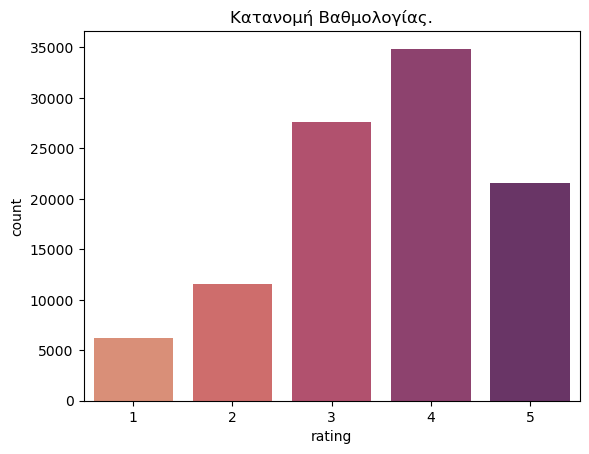

In [241]:
print(f"Κατανομή Βαθμολογίας: \n{merged_dataset['rating'].value_counts().sort_index(ascending=True)}")

sns.countplot(merged_dataset, x='rating', palette='flare')
plt.title("Κατανομή Βαθμολογίας.", fontsize=12)
print("\n")

# Εκπαίδευση του KNN μοντέλου, για την δημιουργία του Συστήματος Συστάσεων.

Δημιουργούμε το matrix user_id - title - ratings, για να μπορούμε να συγκρίνουμε ευκολότερα τους χρήστες μεταξύ τους, ανάλογα με τις βαθμολογίες τους για την κάθε ταινία.

In [242]:
# create a movie-user matrix
train_user_movie_ratings = merged_dataset.pivot_table(index='user_id', columns='title', values='rating').fillna(0)

train_user_movie_ratings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,ï¿½ kï¿½ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [243]:
# create a sparse csr_matrix for easier fitting.
train_sparse_df = csr_matrix(train_user_movie_ratings.values)
train_sparse_df

<944x1630 sparse matrix of type '<class 'numpy.float64'>'
	with 99980 stored elements in Compressed Sparse Row format>

In [244]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(train_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [251]:
# find most similar users to the input user
def find_similar_users(user_id, n = 10):
    knn_input = np.asarray([train_user_movie_ratings.values[user_id-1]])
    distances, indices = knn.kneighbors(knn_input, n_neighbors=n+1)
    
    print("Οι πρώτοι", n ,"χρήστες που μοιάζουν με τον χρήστη", user_id , "είναι: ")
    for i in range(1,len(distances[0])):
        print(i,". Χρήστης:", indices[0][i]+1, "μοιάζει με απόσταση: ", distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]



In [ ]:
def recommend_movies(user_id, top_n):
    similar_users, user_distance = find_similar_users(user_id)

    user_movies = set(merged_dataset[merged_dataset['user_id'] == user_id]['movie_id'])
    
    movie_scores = {}

    for i, sim_user in enumerate(similar_users):
        sim_movies = merged_dataset[merged_dataset['user_id'] == sim_user]
        sim_movies = sim_movies[~sim_movies['movie_id'].isin(user_movies)]

        for _, row in sim_movies.iterrows():
            movie_id = row['movie_id']
            rating = row['rating']
            weight = 1 / (user_distance[i] + 1e-5)

            if movie_id in movie_scores:
                movie_scores[movie_id] += rating * weight
            else:
                movie_scores[movie_id] = rating * weight

    recommended_movie_ids = sorted(movie_scores, key=movie_scores.get, reverse=True)[:top_n]
    recommended_movies = movies[movies['movie_id'].isin(recommended_movie_ids)]

    return recommended_movies



Οι πρώτοι 10 χρήστες που μοιάζουν με τον χρήστη 944 είναι: 
1 . Χρήστης: 8 μοιάζει με απόσταση:  0.6187482458140274
2 . Χρήστης: 584 μοιάζει με απόσταση:  0.6275272464192628
3 . Χρήστης: 638 μοιάζει με απόσταση:  0.6670664746950685
4 . Χρήστης: 738 μοιάζει με απόσταση:  0.6770955642096709
5 . Χρήστης: 513 μοιάζει με απόσταση:  0.6835988349648034
6 . Χρήστης: 748 μοιάζει με απόσταση:  0.6906839761467927
7 . Χρήστης: 619 μοιάζει με απόσταση:  0.6969384740782391
8 . Χρήστης: 137 μοιάζει με απόσταση:  0.6995833523783008
9 . Χρήστης: 22 μοιάζει με απόσταση:  0.7012970544684216
10 . Χρήστης: 254 μοιάζει με απόσταση:  0.7020771839643274
Recommended Movies:
      movie_id                                      title
21        197                          Braveheart (1995)
77       5503                       Fugitive, The (1993)
86         78                        Blade Runner (1982)
93        280          Terminator 2: Judgment Day (1991)
113    226960                           Rock, The (1996)

In [253]:
user_id = 944
#movies_list = train_user_movie_ratings.columns
recommended_movies = recommend_movies(user_id)
print("\nRecommended Movies:\n", recommended_movies)

print(f'\n10 ταινίες που είδε ο χρήστης: {user_id}.')
merged_dataset[(merged_dataset['user_id'] == user_id)].sort_values(by="rating", ascending=False).head(20)

Οι πρώτοι 10 χρήστες που μοιάζουν με τον χρήστη 944 είναι: 
1 . Χρήστης: 8 μοιάζει με απόσταση:  0.6187482458140274
2 . Χρήστης: 584 μοιάζει με απόσταση:  0.6275272464192628
3 . Χρήστης: 638 μοιάζει με απόσταση:  0.6670664746950685
4 . Χρήστης: 738 μοιάζει με απόσταση:  0.6770955642096709
5 . Χρήστης: 513 μοιάζει με απόσταση:  0.6835988349648034
6 . Χρήστης: 748 μοιάζει με απόσταση:  0.6906839761467927
7 . Χρήστης: 619 μοιάζει με απόσταση:  0.6969384740782391
8 . Χρήστης: 137 μοιάζει με απόσταση:  0.6995833523783008
9 . Χρήστης: 22 μοιάζει με απόσταση:  0.7012970544684216
10 . Χρήστης: 254 μοιάζει με απόσταση:  0.7020771839643274

Recommended Movies:
      movie_id                                      title
21        197                          Braveheart (1995)
77       5503                       Fugitive, The (1993)
86         78                        Blade Runner (1982)
93        280          Terminator 2: Judgment Day (1991)
113    226960                           Rock, The (1996

,user_id,movie_id,rating,title
1969,944,199,5,Star Trek: First Contact (1996)
21283,944,62,5,2001: A Space Odyssey (1968)
53192,944,240,5,"Godfather: Part II, The (1974)"
52934,944,273740,5,Star Wars (1977)
27356,944,278589,5,"Empire Strikes Back, The (1980)"
100174,944,2157,5,Lost in Space (1998)
9346,944,1892,4,Return of the Jedi (1983)
40327,944,348,4,Alien (1979)
3653,944,664,4,Twister (1996)
26581,944,686,4,Contact (1997)
